In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict
from matplotlib import colors as cl
import copy

In [3]:
def plot(
        repeat: int,
        iterations: List[int],
        scripts: List[str],
        datasets: List[str],
        key: str,
        scripts_names_mapping: Dict[str, str],
        cpus: List[int] = [1],
        datasets_sizes: List[int] = None,
        colors: List[str] = ['r', 'g', 'b'],
        suffix: str = "",
        ):
    for c, script_name in enumerate(scripts):
        res = []
        for cpu in cpus:
            for i in iterations:
                for dataset in datasets:
                    arr = []
                    for r in range(repeat):
                        path = f"logs/{cpu}_{dataset.split('/')[-1]}-{script_name}-{i}-{r}{suffix}.csv"
                        try:
                            df = pd.read_csv(path, names=["memory", "time"])
                        except Exception:
                            path = f"logs/{dataset.split('/')[-1]}-{script_name}-{i}-{r}{suffix}.csv"
                            df = pd.read_csv(path, names=["memory", "time"])
                        arr.append(df.iloc[0][key])
                    arr = np.sort(arr)
                    res.append(arr)
        res = np.array(res).reshape(-1, repeat)
        do_plot = True
        if len(iterations) > 1:
            t = iterations
        elif len(datasets) > 1:
            t = datasets_sizes
        else:
            do_plot = False
        if do_plot:
            plt.plot(t, res[:,1], label=scripts_names_mapping[script_name], c=colors[c])
            plt.fill_between(t, res[:,0], res[:,2], color=(*cl.to_rgba(colors[c])[:3], 0.5))
        else:
            if key == "memory":
                res/= 1e9
            res = res.reshape(-1, repeat)
            mid = repeat // 2
            val = res[:,mid]
            dev = np.maximum(res[:,mid]-res[:,0], res[:,-1]-res[:,mid])
            out = [f"{np.round(a, 1)} +- {np.round(b, 1)}" for a, b in zip(val, dev)]
            print(scripts_names_mapping[script_name], "\t".join(out))
    
    if do_plot:
        plt.tight_layout()
        if len(iterations) > 1:
            plt.xlabel("PR iterations")
            plt.xticks(iterations)
        else:
            plt.xlabel("Dataset size [1M]")
            plt.xticks(datasets_sizes)

        plt.ylabel(key)
        plt.legend()
        plt.show()
#     plt.save("plots/")

In [4]:
scripts_names_mapping = {
    "spark_pagerank_2.py": "Different implementation (RDD)",
    "spark_pagerank_4.py": "Same as pw (RDD)",
    "spark_pagerank_sql.py": "Same as pw (SQL)",
    "spark_pagerank_example.py": "Example from spark docs (RDD)",
    "graphxpagerank.jar": "Graphx",
    "sqlpagerank.jar": "Same as pw (SQL) in Scala"
}

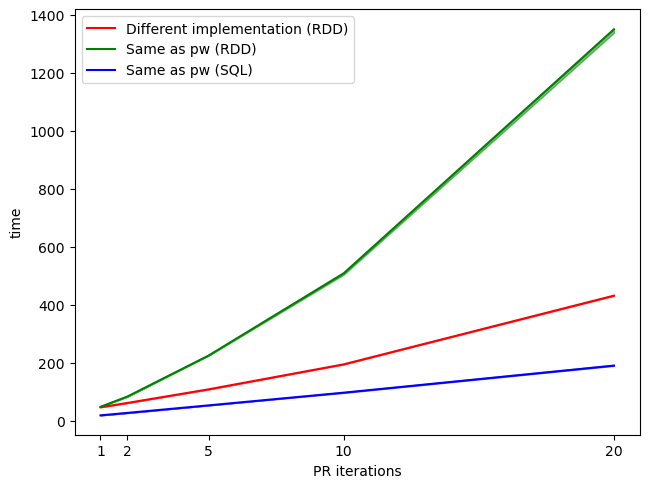

In [23]:
scripts = [
    "spark_pagerank_2.py",
    "spark_pagerank_4.py",
    "spark_pagerank_sql.py",
]

plot(3, [1,2,5,10,20], scripts, ["livejournal_truncated.json"], "time", scripts_names_mapping)

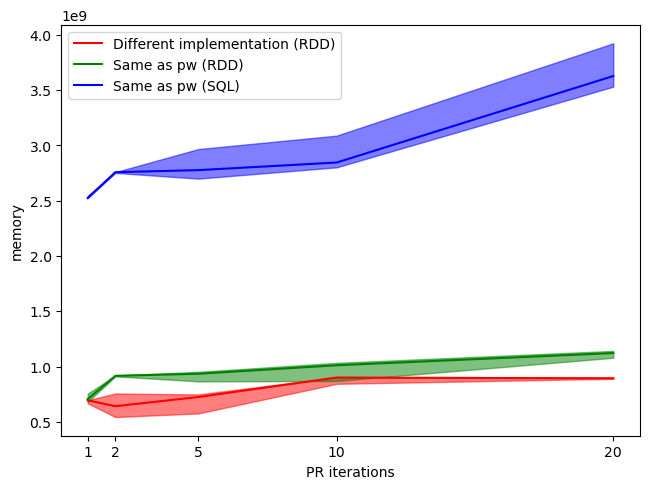

In [24]:
plot(3, [1,2,5,10,20], scripts, ["livejournal_truncated.json"], "memory", scripts_names_mapping)

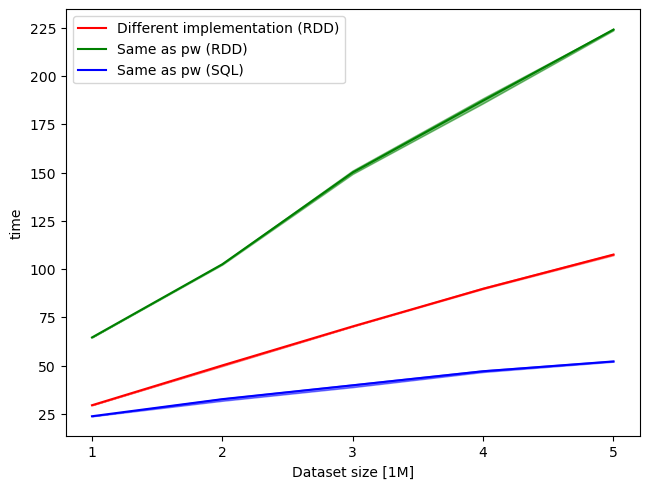

In [25]:
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated_1M.json", "livejournal_truncated_2M.json", "livejournal_truncated_3M.json", "livejournal_truncated_4M.json", "livejournal_truncated.json"],
    "time",
    scripts_names_mapping,
    datasets_sizes=[1, 2, 3, 4, 5])

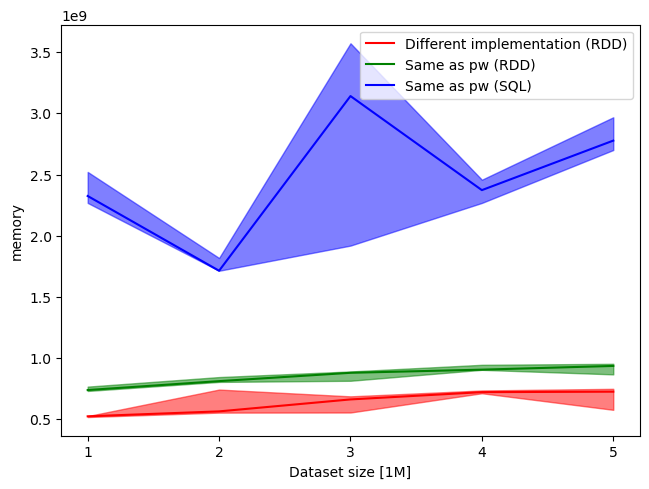

In [26]:
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated_1M.json", "livejournal_truncated_2M.json", "livejournal_truncated_3M.json", "livejournal_truncated_4M.json", "livejournal_truncated.json"],
    "memory",
    scripts_names_mapping,
    datasets_sizes=[1, 2, 3, 4, 5])

In [41]:
scripts = [
    "spark_pagerank_2.py",
    "spark_pagerank_4.py",
    "spark_pagerank_sql.py",
    "spark_pagerank_example.py",
    "sqlpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.json"],
    "time",
    scripts_names_mapping,
    suffix="_plus_io"
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.tsv"],
    "time",
    scripts_names_mapping,
    suffix="_plus_io"
)

Different implementation (RDD) ['110.7 +- 0.7']
Same as pw (RDD) ['230.1 +- 1.0']
Same as pw (SQL) ['69.4 +- 2.1']
Example from spark docs (RDD) ['138.1 +- 1.2']
Same as pw (SQL) in Scala ['66.1 +- 2.3']
Graphx ['16.2 +- 0.7']


In [42]:
scripts = [
    "spark_pagerank_2.py",
    "spark_pagerank_4.py",
    "spark_pagerank_sql.py",
    "spark_pagerank_example.py",
    "sqlpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.json"],
    "memory",
    scripts_names_mapping,
    suffix="_plus_io"
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.tsv"],
    "memory",
    scripts_names_mapping,
    suffix="_plus_io"
)

Different implementation (RDD) ['0.7 +- 0.1']
Same as pw (RDD) ['0.9 +- 0.0']
Same as pw (SQL) ['2.9 +- 0.2']
Example from spark docs (RDD) ['1.2 +- 0.0']
Same as pw (SQL) in Scala ['2.5 +- 1.8']
Graphx ['1.4 +- 1.5']


In [43]:
scripts = [
    "spark_pagerank_sql.py",
    "sqlpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["soc-LiveJournal1.json"],
    "time",
    scripts_names_mapping,
    suffix="_plus_io"
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["soc-LiveJournal1.tsv"],
    "time",
    scripts_names_mapping,
    suffix="_plus_io"
)

Same as pw (SQL) ['548.0 +- 25.0']
Same as pw (SQL) in Scala ['571.4 +- 9.3']
Graphx ['131.2 +- 2.6']


In [44]:
scripts = [
    "spark_pagerank_sql.py",
    "sqlpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["soc-LiveJournal1.json"],
    "memory",
    scripts_names_mapping,
    suffix="_plus_io"
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["soc-LiveJournal1.tsv"],
    "memory",
    scripts_names_mapping,
    suffix="_plus_io"
)

Same as pw (SQL) ['5.8 +- 0.5']
Same as pw (SQL) in Scala ['4.2 +- 0.2']
Graphx ['8.2 +- 0.1']


In [45]:
#######################################################################################

In [6]:
scripts = [
    "spark_pagerank_sql.py",
#     "spark_pagerank_example.py",
]
plot(
    5,
    [5],
    scripts,
    ["soc-LiveJournal1.json"],
    "time",
    scripts_names_mapping,
    cpus=[1, 2, 4, 6, 8, 10, 12]
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    5,
    [5],
    scripts,
    ["soc-LiveJournal1.tsv"],
    "time",
    scripts_names_mapping,
    cpus=[1, 2, 4, 6, 8, 10, 12]
)

Same as pw (SQL) 556.3 +- 37.7	340.4 +- 18.3	193.2 +- 13.1	142.9 +- 3.7	122.5 +- 5.5	93.8 +- 4.0	88.9 +- 1.9
Graphx 130.4 +- 1.5	77.8 +- 1.8	44.2 +- 0.7	34.7 +- 0.6	29.6 +- 1.4	27.3 +- 0.6	26.2 +- 0.6


In [50]:
scripts = [
    "spark_pagerank_sql.py",
    "spark_pagerank_example.py",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.json"],
    "memory",
    scripts_names_mapping,
    cpus=[1, 2, 4, 6]
)

scripts = [
    "graphxpagerank.jar",
]
plot(
    3,
    [5],
    scripts,
    ["livejournal_truncated.tsv"],
    "memory",
    scripts_names_mapping,
    cpus=[1, 2, 4, 6]
)

Same as pw (SQL) 2.9 +- 1.6	2.9 +- 0.0	3.1 +- 0.2	2.9 +- 0.5
Example from spark docs (RDD) 1.2 +- 0.0	4.4 +- 0.0	4.7 +- 0.3	5.0 +- 0.2
Graphx 1.5 +- 1.4	2.5 +- 0.3	2.4 +- 0.2	2.6 +- 0.5


In [4]:
def get_rows(
    repeats: int,
    iterations: List[int],
    cpus: List[int],
    script: str,
    dataset: str,
):
    res = []
    for cpu in cpus:
        for i in iterations:
            for r in range(repeats):
                path = f"logs/{cpu}_{dataset.split('/')[-1]}-{script}-{i}-{r}.csv"
                df = pd.read_csv(path, names=["memory", "time"])
                res.append((
                    cpu,
                    i,
                    df.iloc[0]["time"],
                    int(np.round(df.iloc[0]["memory"] / 1024)),
                ))
    return pd.DataFrame(res, columns=["n_workers", "n_steps", "time_elapsed", "mem_peak_kb"])

In [18]:
get_rows(
    5,
    [1, 2, 5, 10, 20],
    [1, 2, 4, 6, 8, 10, 12],
    "spark_pagerank_sql.py",
    "soc-LiveJournal1.json"
).to_csv("results/sql.tsv", sep="\t")

In [19]:
get_rows(
    5,
    [1, 2, 5, 10, 20],
    [1, 2, 4, 6, 8, 10, 12],
    "graphxpagerank.jar",
    "soc-LiveJournal1.tsv"
).to_csv("results/graphx.tsv", sep="\t")

In [10]:
get_rows(
    1,
    [1, 2, 5, 10, 20],
    [1, 2, 4, 6, 8, 10, 12],
    "spark_pagerank_example.py",
    "soc-LiveJournal1.json"
).to_csv("results/example.tsv", sep="\t")

In [21]:
sql = pd.read_csv("results/sql.tsv", sep="\t", index_col="Unnamed: 0").groupby(["n_workers", "n_steps"]).median()
example = pd.read_csv("results/example.tsv", sep="\t", index_col="Unnamed: 0").groupby(["n_workers", "n_steps"]).median()
example / sql

time_elapsed  mem_peak_kb
n_workers n_steps                           
1         1            7.825229     0.760938
          2            6.725139     0.386592
          5            4.751468     0.885704
          10           3.778107     0.861008
          20           3.402908     0.708454
2         1            7.204144     1.694416
          2            6.019494     1.532471
          5            4.137392     2.616557
          10           3.427178     1.209193
          20           3.068325     0.995294
4         1            6.991647     1.722122
          2            5.813295     1.615545
          5            4.045482     1.442449
          10           3.097440     1.382655
          20           2.745368     1.516754
6         1            7.695265     1.344741
          2            6.311678     2.834932
          5            3.993211     3.063206
          10           3.102548     2.142197
          20           2.718470     1.252436
8         1            7.180054     2.366925
          2            5.570855     1.951379
          5            3.636323     1.521239
          10           2.807132     2.155888
          20           2.416839     1.199124
10        1            8.235218     1.509453
          2            6.386958     1.607103
          5            4.462456     1.350271
          10           3.233702     2.217207
          20           2.707107     1.915460
12        1            7.121860     2.753566
          2            5.905081     1.474882
          5            3.973423     3.054628
          10           3.006713     1.426141
          20           2.542328     1.882071

In [2]:
df = pd.read_csv("results/all.csv")

In [3]:
df.groupby(["runtime", "dataset", "code_version"]).count()

n_workers  n_steps  \
runtime      dataset        code_version                                     
flink        livejournal    mateusz/flink-local-runall        175      175   
pathway      livejournal    pu/testenv10                      105      105   
                            pu/testenv11                      175      175   
                            pu/testenv13                      175      175   
             livejournal-5M pu/testenv11                        2        2   
                            pu/testenv13                      175      175   
spark-graphx livejournal    kamil/pagerank-spark              175      175   
spark-sql    livejournal    kamil/pagerank-spark              175      175   

                                                        time_elapsed  \
runtime      dataset        code_version                               
flink        livejournal    mateusz/flink-local-runall           175   
pathway      livejournal    pu/testenv10                         105   
                            pu/testenv11                         175   
                            pu/testenv13                         175   
             livejournal-5M pu/testenv11                           2   
                            pu/testenv13                         175   
spark-graphx livejournal    kamil/pagerank-spark                 175   
spark-sql    livejournal    kamil/pagerank-spark                 175   

                                                        mem_peak_kb  \
runtime      dataset        code_version                              
flink        livejournal    mateusz/flink-local-runall          175   
pathway      livejournal    pu/testenv10                        105   
                            pu/testenv11                        175   
                            pu/testenv13                        175   
             livejournal-5M pu/testenv11                          2   
                            pu/testenv13                        175   
spark-graphx livejournal    kamil/pagerank-spark                175   
spark-sql    livejournal    kamil/pagerank-spark                175   

                                                        commit_hash  run_date  \
runtime      dataset        code_version                                        
flink        livejournal    mateusz/flink-local-runall          175       175   
pathway      livejournal    pu/testenv10                        105       105   
                            pu/testenv11                        175       175   
                            pu/testenv13                        175       175   
             livejournal-5M pu/testenv11                          2         2   
                            pu/testenv13                        175       175   
spark-graphx livejournal    kamil/pagerank-spark                175       175   
spark-sql    livejournal    kamil/pagerank-spark                175       175   

                                                        batch_size  \
runtime      dataset        code_version                             
flink        livejournal    mateusz/flink-local-runall         175   
pathway      livejournal    pu/testenv10                       105   
                            pu/testenv11                       175   
                            pu/testenv13                       175   
             livejournal-5M pu/testenv11                         2   
                            pu/testenv13                       175   
spark-graphx livejournal    kamil/pagerank-spark               175   
spark-sql    livejournal    kamil/pagerank-spark               175   

                                                        configuration  
runtime      dataset        code_version                               
flink        livejournal    mateusz/flink-local-runall            175  
pathway      livejournal    pu/testenv10                          105  
                            pu/testenv11   

In [17]:
def get_bar_plot(df: pd.DataFrame, settings: List[Dict], data_key: str, xlabel: str):
    res = None
    for setting in settings:
        df_local = df
        for key, val in setting.items():
            if key == "name":
                continue
            df_local = df_local[df_local[key] == val]
        tmp = copy.deepcopy(df_local)
        df_local = df_local[["runtime", "n_workers", "n_steps", data_key]]
        df_local = df_local.groupby(by=["n_workers", "n_steps"]).median(numeric_only=True)
        df_local[setting["name"]] = df_local[data_key]
        del df_local[data_key]
        if res is None:
            res = df_local
        else:
            res = res.join(df_local, on=["n_workers", "n_steps"])
        single = tmp[tmp["n_workers"] == 1]
        mult = tmp[tmp["n_workers"] == 12]
        single = single.groupby("n_steps").median(numeric_only=True)
        mult = mult.groupby("n_steps").median(numeric_only=True)
        speedup = (single[data_key] / mult[data_key]).to_numpy()
        print(setting["name"], " ".join([f"{x}" for x in np.round(speedup, 2)]))
        
    df = res
    display(df)
#     df = df.sort_values(["n_workers", "n_steps"])
#     plt.figure(figsize=(10, 20))
#     plt.tight_layout()
    df.plot.barh(figsize=(10, 15), width=0.9, xlabel=xlabel)

pathway 1.77 1.99 2.28 2.79 3.57
flink 2.06 2.32 3.1 3.64 4.41
spark-graphx 4.7 4.75 4.99 5.43 5.68
spark-sql 6.83 6.47 6.26 6.23 6.06


pathway  flink  spark-graphx    spark-sql
n_workers n_steps                                              
1         1         98.047100  105.0     87.535424   239.142659
          2        108.267802  130.0     97.584828   303.012755
          5        142.003886  214.0    130.383905   556.326384
          10       197.935622  349.0    188.870832   984.774416
          20       310.638076  630.0    300.149689  1806.423852
2         1         61.217140   67.0     54.030701   137.380867
          2         66.748553   83.0     59.583378   180.025761
          5         85.586735  133.0     77.752919   340.355811
          10       116.536067  220.0    107.533380   571.165465
          20       178.280613  382.0    168.142312  1064.371046
4         1         48.141803   55.0     30.425796    77.511189
          2         51.658897   65.0     33.755407   104.126558
          5         61.710630   98.0     44.228328   193.169407
          10        78.742516  146.0     60.266605   348.097704
          20       112.363183  246.0     93.753849   645.368019
6         1         44.439372   52.0     23.892964    51.468987
          2         47.468225   62.0     26.803602    70.111818
          5         54.502515   84.0     34.680084   142.919759
          10        66.953353  120.0     46.983677   253.082432
          20        92.020670  194.0     74.160516   471.229929
8         1         56.118819   54.0     20.469584    43.851341
          2         59.095456   59.0     22.409950    62.404671
          5         63.490752   79.0     29.633749   122.513571
          10        74.500352  110.0     38.897532   217.309341
          20        95.061182  172.0     60.025341   413.171070
10        1         53.813767   54.0     20.211985    37.369417
          2         57.368854   57.0     22.304048    52.792961
          5         62.927405   73.0     27.267271    93.802421
          10        71.686022  101.0     36.522260   171.369488
          20        91.644894  153.0     56.731632   323.519782
12        1         55.319806   51.0     18.616881    35.028619
          2         54.298080   56.0     20.543151    46.825186
          5         62.187370   69.0     26.152139    88.913266
          10        71.010446   96.0     34.775043   158.160291
          20        86.896181  143.0     52.840926   298.068021

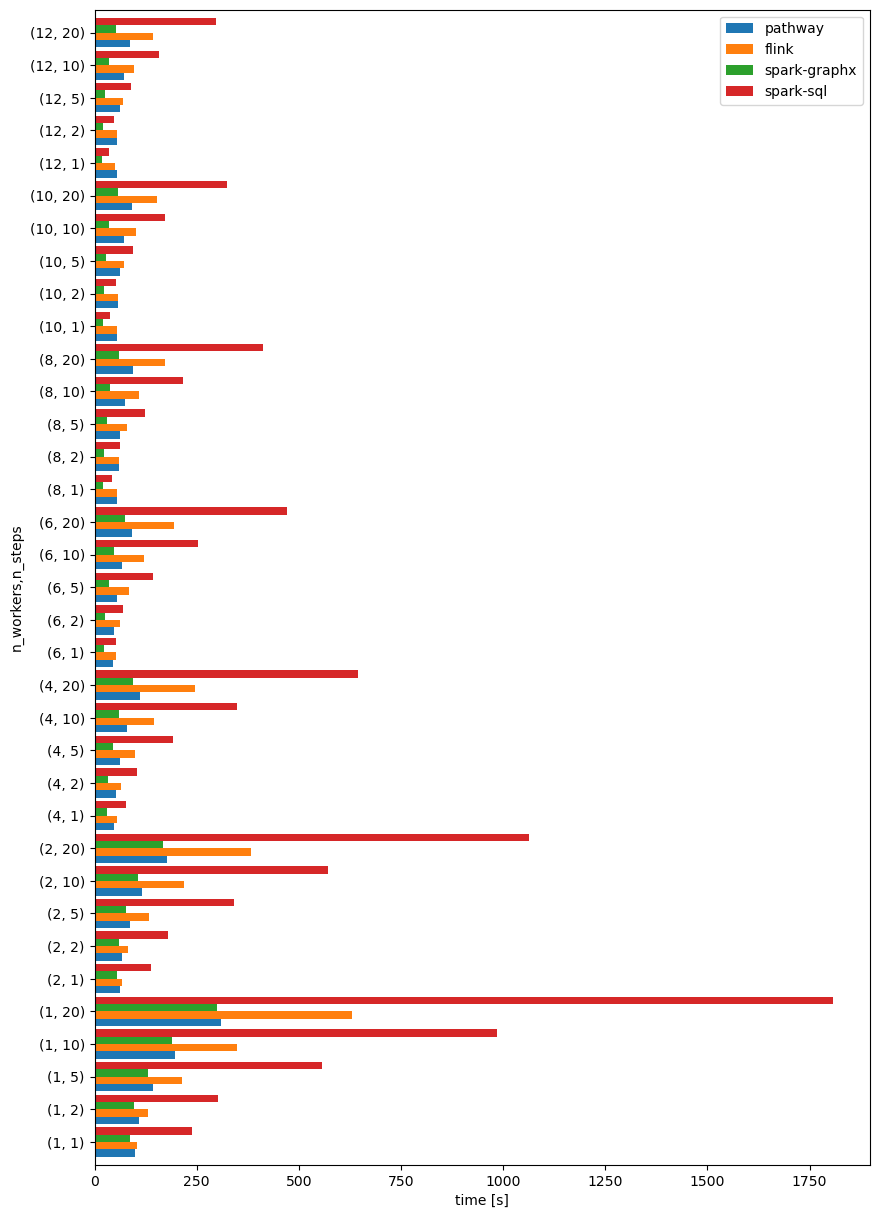

In [18]:
get_bar_plot(
    df,
    [
    {"runtime": "pathway", "dataset": "livejournal", "code_version": "pu/testenv13", "name": "pathway"},
    {"runtime": "flink", "name": "flink"},
    {"runtime": "spark-graphx", "name": "spark-graphx"},
    {"runtime": "spark-sql", "name": "spark-sql"},
    ],
    "time_elapsed",
    "time [s]"
)

pathway        flink  spark-graphx
n_workers n_steps                                       
1         1        20902088.0  1939560.289     6876596.0
          2        19032036.0  2124579.055     6977700.0
          5        19671376.0  2217712.500     8038052.0
          10       21534876.0  2271476.352     8583312.0
          20       25076408.0  2504649.930     9506952.0
2         1        17636108.0  4678957.398    20425760.0
          2        19138568.0  4586434.234    20849428.0
          5        19902648.0  4972531.453    21113000.0
          10       19631328.0  4362575.109    20836324.0
          20       23322396.0  6351474.289    21189388.0
4         1        18194084.0  4363015.539    19926116.0
          2        19283028.0  4202564.156    19828504.0
          5        18651480.0  4564939.336    19954616.0
          10       20772100.0  5151251.195    19868924.0
          20       22983580.0  5977195.281    20386484.0
6         1        15450944.0  3869931.102    19508076.0
          2        18114992.0  5076506.055    19521472.0
          5        17764220.0  5075554.438    19542648.0
          10       19073292.0  5416513.539    19403828.0
          20       23811624.0  5511319.477    19641484.0
8         1        16448976.0  4309278.719    19373268.0
          2        15895788.0  4673216.883    19245600.0
          5        17793716.0  5319535.164    19603464.0
          10       19211220.0  5429149.180    19648992.0
          20       23097868.0  5742948.781    19609448.0
10        1        16444848.0  4858614.375    19533288.0
          2        16931564.0  4875322.711    19960148.0
          5        18089332.0  5862849.266    19205860.0
          10       19132404.0  5717927.188    19329848.0
          20       22654164.0  6008109.609    19804116.0
12        1        15465744.0  4689180.961    19301444.0
          2        16514140.0  4470665.367    19380556.0
          5        16986176.0  6027127.141    19758616.0
          10       18908980.0  6619606.961    19678700.0
          20       24140648.0  6632889.031    20151928.0

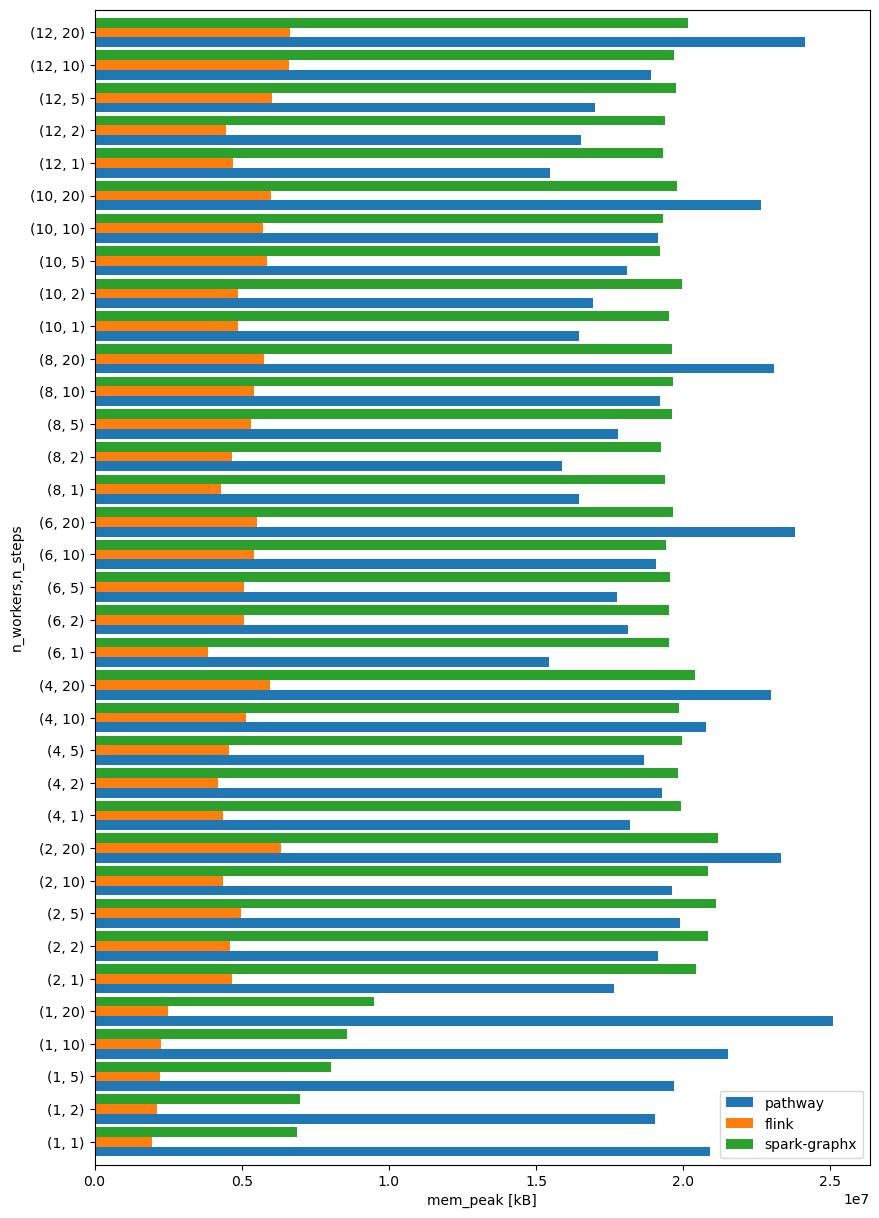

In [8]:
get_bar_plot(
    df,
    [
    {"runtime": "pathway", "dataset": "livejournal", "code_version": "pu/testenv13", "name": "pathway"},
    {"runtime": "flink", "name": "flink"},
    {"runtime": "spark-graphx", "name": "spark-graphx"},
#     {"runtime": "spark-sql", "name": "spark-sql"},
    ],
    "mem_peak_kb",
    "mem_peak [kB]"
)